In [1]:
pip install numpy pandas matplotlib tensorflow yfinance scikit-learn

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [31]:
# Downloading stock data
ticker = 'INFY'  
data = yf.download(ticker, start='2010-01-01', end='2024-07-01')

# Displaying the first few rows
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,17.990000,18.190001,17.959999,18.139999,18.139999,5758800
2024-06-25,18.260000,18.360001,18.160000,18.340000,18.340000,8733100
2024-06-26,18.290001,18.350000,18.160000,18.219999,18.219999,8693400
2024-06-27,18.620001,18.700001,18.549999,18.629999,18.629999,8949300
2024-06-28,18.690001,18.740000,18.540001,18.620001,18.620001,9520300


In [32]:
# Selecting the 'Close' price
data = data[['Close']]

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Sequencing length
seq_length = 60

# Creating sequences
X, y = create_sequences(scaled_data, seq_length)

# Splitting the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [33]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
72/72 [==============================] - 6s 88ms/step - loss: 2.1174e-04 - val_loss: 6.8294e-04
Epoch 2/50
72/72 [==============================] - 6s 82ms/step - loss: 1.9420e-04 - val_loss: 6.1048e-04
Epoch 3/50
72/72 [==============================] - 6s 87ms/step - loss: 1.9812e-04 - val_loss: 9.9746e-04
Epoch 4/50
72/72 [==============================] - 7s 92ms/step - loss: 1.8519e-04 - val_loss: 6.0171e-04
Epoch 5/50
72/72 [==============================] - 7s 103ms/step - loss: 1.6466e-04 - val_loss: 3.4535e-04
Epoch 6/50
72/72 [==============================] - 7s 102ms/step - loss: 1.6709e-04 - val_loss: 3.8662e-04
Epoch 7/50
72/72 [==============================] - 7s 102ms/step - loss: 1.5055e-04 - val_loss: 8.4006e-04
Epoch 8/50
72/72 [==============================] - 7s 99ms/step - loss: 1.5319e-04 - val_loss: 3.1751e-04
Epoch 9/50
72/72 [==============================] - 7s 102ms/step - loss: 1.4698e-04 - val_loss: 8.4971e-04
Epoch 10/50
72/72 [==============

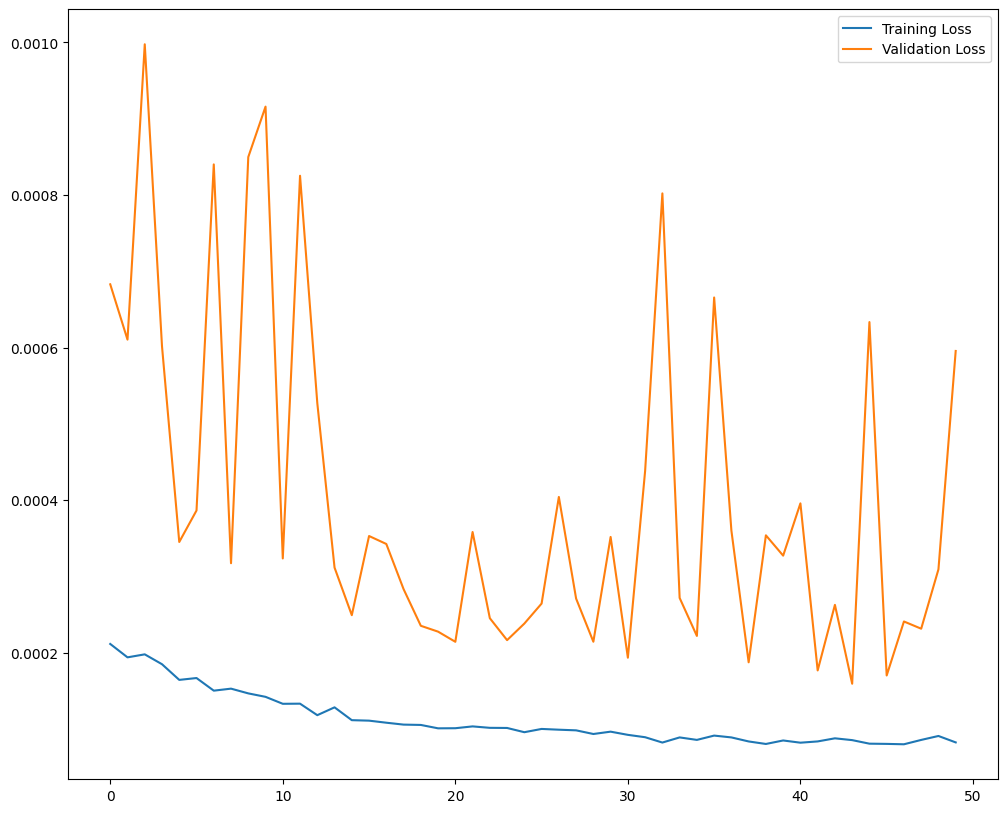

In [37]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plotting the training and validation loss
plt.figure(figsize = (12,10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

23/23 [==============================] - 2s 24ms/step


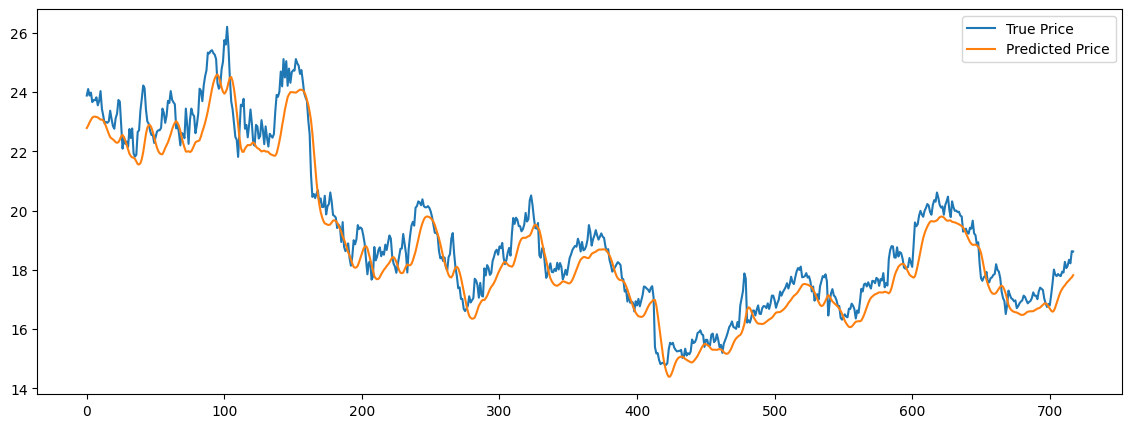

In [35]:
# Making predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Inverse transform the true prices as well
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(14,5))
plt.plot(true_prices, label='True Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.legend()
plt.show()


In [36]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(true_prices, predicted_prices))
print(f'RMSE: {rmse}')


RMSE: 0.7317385623186934
